# Project: Using logistic regression to predict the survival of the Titanic

## Analysis Objectives

The purpose of this data analysis report is to conduct logistic regression analysis on the survival situation of Titanic passengers based on their gender and cabin class attributes, so that the obtained model can be used to predict whether passengers with unknown survival situations will survive the sinking event based on their attributes.

## Abstract

> The RMS Titanic was an Olympic class cruise ship that sank after colliding with an iceberg during its maiden voyage in April 1912. The Titanic is the second of three super cruise ships in its class, providing Atlantic travel for passengers of the White Star Line along with sister ships Olympic and Britain.

> The Titanic was built by the Harlan Wolf shipyard in Belfast, Northern Ireland, and was the largest passenger ship of its time. Due to its size comparable to a modern aircraft carrier, it was known as a "giant cruise ship that even God cannot sink.". On the maiden voyage of the Titanic, it departed from Southampton, England, passing through Cherbourg Octeville, France and Queenstown, Ireland, with plans to cross the Atlantic to New York City, USA. But due to human error, the ship collided with an iceberg at 11:40 pm on April 14, 1912; Two hours and 40 minutes later, at 02:20 am on April 15th, the ship split in half and sank into the Atlantic Ocean, with a death toll of over 1500 people, making it the largest maritime disaster of the 20th century and one of the most well-known.

The dataset includes two data tables: `titianic_train.csv`and`titanic_test.csv`.

`titianic_train.csv` recorded the survival of over 800 Titanic passengers after the sinking incident, as well as relevant information about the passengers, including cabin class, gender, age, number of companions/siblings on board, number of parents/children on board, and so on.

`titanic_test.csv` only contains information related to passengers (who are not in `titianic_train.csv`), and this file can be used to predict whether passengers will survive.

`titianic_train.csv`The meaning of each column is as follows:
- PassengerId：ID number of each passenger
- survival：Survived or not
   - 0	no
   - 1	yes
- pclass：Cabin level
   - 1	First class
   - 2	second class
   - 3  third class
- sex：Gender of passengers
- Age：Passenger's age
- sibsp：Number of co-passengers/siblings
- parch：Number of parents/children on board
- ticket：Ticket number
- fare：Ticket price amount
- cabin：Cabin number
- embarked：Boarding port
   - C  Cherbourg
   - Q  Queenstown
   - S  Southampton
   
   
`titianic_test.csv`The meaning of each column is the same as above, but it does not contain data on the survival variable, that is, whether it has survived.

## Data reading

Import the libraries required for data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We plan to train the prediction model using `titanic_train.csv` first, so in terms of reading data, we currently only need to import `titanic_train.csv`.

By using the `read_csv` function in Pandas, parse the data content in the original data file AAA into DataFrame and assign it to the variable `titanic_train.csv`.

In [2]:
original_titanic_train = pd.read_csv("./titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data evaluating and cleaning

In this section, we will evaluate and clean up the data contained in the DataFrame named `original_titanic_train` established in the previous section.

Mainly from two aspects: structure and content, namely neatness and cleanliness.

The structural problem of data refers to not meeting the three criteria of "one column for each variable, one row for each observation, and one table for each type of observation"; The content issues of data include lost data, duplicate data, invalid data, etc.

In order to distinguish between the cleaned data and the original data, we create a new variable `cleaned_titanic_train` and make it a copy copied from `original_titanic_train`. Our subsequent cleaning steps will be applied to `cleaned_titanic_train`.

In [3]:
cleaned_titanic_train = original_titanic_train.copy()

### Data neatness

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the top 10 rows of data, it can be seen that the data conforms to "one column for each variable, one row for each observation, and one table for each type of observation", so there is no structural issue.

### Data cleanliness

Using `info` to gain a general understanding of the data content.

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the output results, there are a total of 891 observations in `cleaned_titanic_train`, among which there are missing values in `Age`, `Cabinet`, and `Embarked`, which will be evaluated and cleaned up in the future.

In terms of data type, `PassengerId` represents the passengers' ID number, and the data type should not be a number, but a string, so data format conversion is required.

And, we know that `Survived`, `Pclass`, `Sex`, and `Embarked` are all classified data, which can be converted to Category.

In [6]:
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')

In [7]:
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype('category')
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype('category')
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype('category')
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype('category')

In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.7+ KB


#### Handling missing data

From the output of the 'info' method, it can be seen that there are missing values for the 'Age', 'Cabinet', and 'Embarked' variables in `cleaned_titanic_train`.

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


There are 177 missing age variables with observed values, accounting for about 20% of the overall data. Due to the large number of observations and the fact that other variables can still provide value for analysis, it is best to keep these rows.

But because the logistic regression function `Logit` we need to use later does not allow missing values to be included in the data, we fill in the missing values with the average age of passengers.

In [10]:
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

0

In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


There are 687 missing cabin number variables for observation values, indicating that cabin number data is unknown in most of the observations, so these observations cannot be deleted.

In addition, we believe that the cabin number is not a key factor affecting the probability of survival and will not be included in the independent variables of logistic regression. Even if it is missing, it will not affect the establishment of the model, so these observations can be retained.

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The boarding port variable with only two observations is missing, but we believe that boarding port is not a key factor affecting survival probability and will not be included in the independent variables of logistic regression. Even if missing, it will not affect the establishment of the model, so these observations can be retained.

#### Handling duplicate data

Based on the meaning and content of the data variables, `PassengerId` is the unique identifier of the passenger and should not have duplicates. Therefore, it should be checked for duplicate values.

In [13]:
cleaned_titanic_train["PassengerId"].duplicated().sum()

0

The output result is 0, indicating that there are no duplicate values.

#### Handling inconsistent data

Inconsistent data may exist in all categorical variables, and we need to check if there are situations where different values actually refer to the same target.

In [14]:
cleaned_titanic_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
cleaned_titanic_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
cleaned_titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
cleaned_titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

From the above output results, there is no inconsistent data.

#### Handling invalid or incorrect data

The `describe` method of DataFrame can be used to quickly understand numerical statistical information.

In [18]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


The average age of passengers is around 30 years old, with a maximum of 80 years old and a minimum of 0.42 years old. The maximum number of co passengers/siblings is 8, and the minimum is 0. The maximum number of parents/children on board is 6, and the minimum number is 0. The average ticket price is 32 yuan, with a maximum value of 512 yuan and a minimum value of 0 yuan. It is speculated that 0 yuan represents an additional ticket. There are no unrealistic numerical values in the data.

## Data organizing

The organization of data should be closely related to the direction of analysis. The goal of this data analysis is to predict the probability of survival after the sinking of the Titanic based on relevant information from its passengers.

The data variables include the number of passengers sharing the same companion/sibling, as well as the number of parents/children sharing the same passenger, which can help calculate the number of family members on board. We are interested in whether the number of co riding family members significantly affects survival, so we can create a new variable `FamilyNum` to record this value.

In [19]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Data exploring

Before embarking on logistic regression analysis, we can first use data visualization to explore the distribution of numerical variables and variables that are correlated with passenger survival, providing direction for further analysis in the future.

In [20]:
# Set the chart color palette to "pastel"
sns.set_palette("pastel")

In [21]:
# Set chart size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### Survival ratio

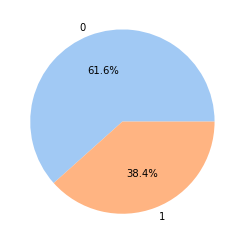

In [22]:
survived_count = cleaned_titanic_train['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

From the above pie chart, it can be seen that the number of passengers killed on the Titanic was more than the number of surviving passengers, with a ratio of approximately 3:2.

### Passenger age

In [23]:
cleaned_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


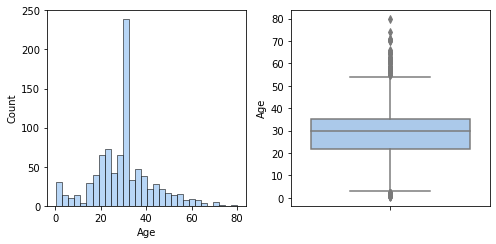

In [24]:
figure, axes = plt.subplots(1, 2)
sns.histplot(x=cleaned_titanic_train['Age'], ax=axes[0])
sns.boxplot(y=cleaned_titanic_train['Age'], ax=axes[1])
plt.show()

Most passengers are between the ages of 20 and 40, but there are many elderly passengers and infants.

### Passenger age and survival

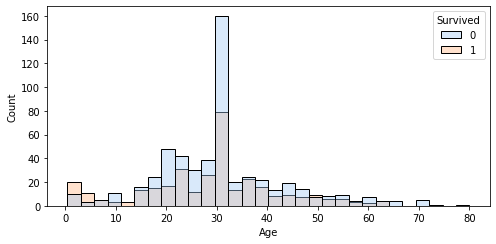

In [25]:
sns.histplot(cleaned_titanic_train, x='Age', hue='Survived', alpha=0.4)
plt.show()

From the passenger age histogram, it can be seen that only the infant population has a higher proportion of survivors, while the vast majority of other age groups have more fatalities than survivors.

### Distribution of ticket amounts

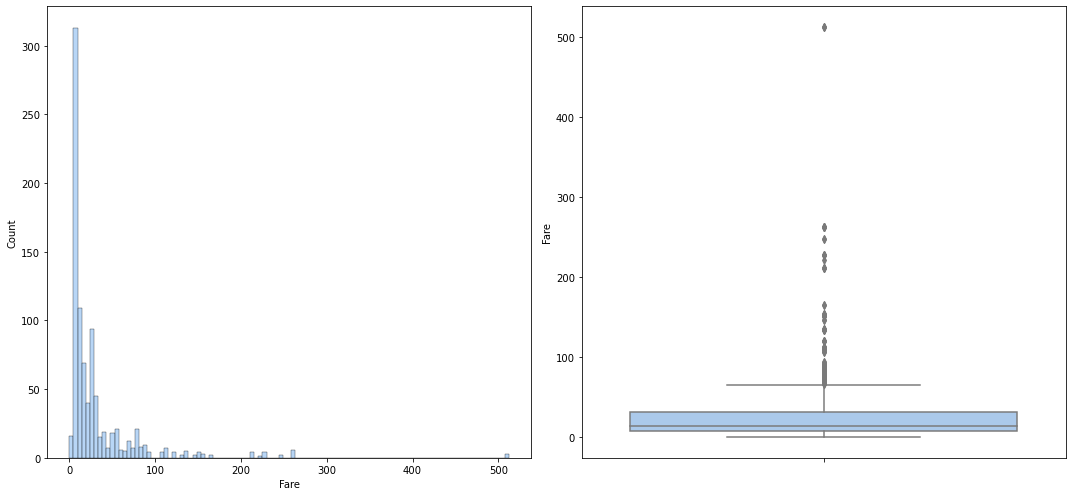

In [26]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(x=cleaned_titanic_train['Fare'], ax=axes[0])
sns.boxplot(y=cleaned_titanic_train['Fare'], ax=axes[1])
plt.show()

The ticket amount shows a right skewed distribution, indicating that most of the ticket prices in the dataset are moderate, but there are some extreme values of high ticket prices that cause the mean to be pulled up.

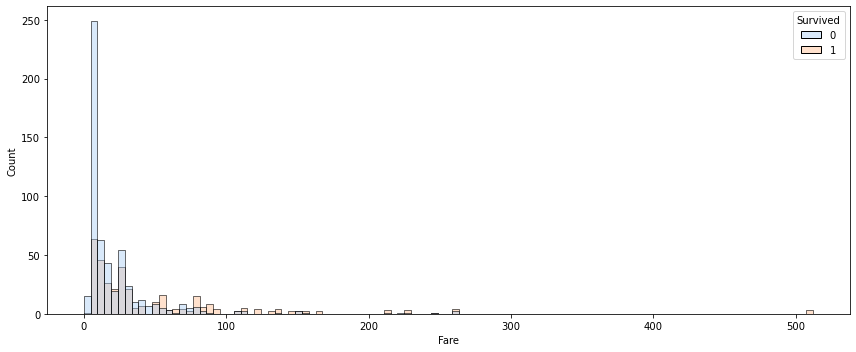

In [27]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(cleaned_titanic_train, x='Fare', hue='Survived', alpha=0.4)
plt.show()

### The relationship between cabin class and survival

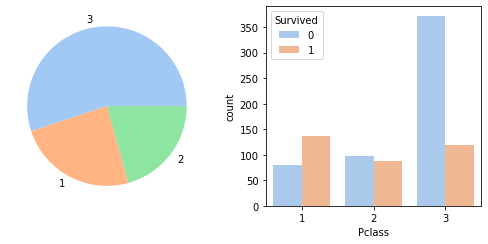

In [28]:
figure, axes = plt.subplots(1, 2)
pclass_count = cleaned_titanic_train['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(x=cleaned_titanic_train['Pclass'], hue=cleaned_titanic_train['Survived'], ax=axes[1])
plt.show()

From the bar chart between survival and cabin class, it can be seen that passengers with lower cabin class have a higher proportion of fatalities, while passengers with higher cabin class have a higher proportion of survivors.

### The relationship between gender and survival

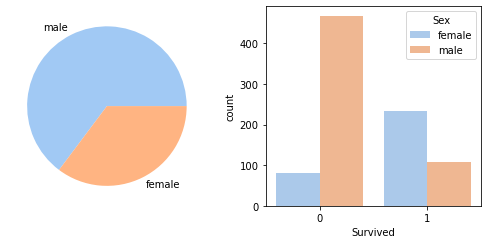

In [29]:
figure, axes = plt.subplots(1, 2)
sex_count = cleaned_titanic_train['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(x=cleaned_titanic_train['Survived'], hue=cleaned_titanic_train['Sex'], ax=axes[1])
plt.show()

From the bar chart between survival and gender, it can be seen that male passengers have a higher proportion of fatalities, while female passengers have a higher proportion of survivors.

### The relationship between boarding port and survival

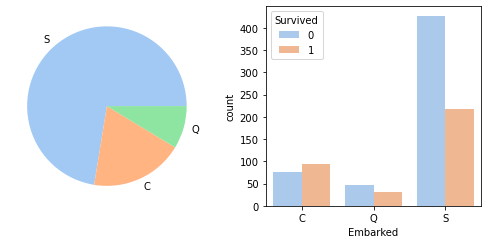

In [30]:
figure, axes = plt.subplots(1, 2)
embarked_count = cleaned_titanic_train['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(x=cleaned_titanic_train['Embarked'], hue=cleaned_titanic_train['Survived'], ax=axes[1])
plt.show()

From the bar chart between the number of survivors and boarding ports, it can be seen that the number of passengers boarding in Cherbourg is greater than the number of fatalities, while Queenstown and Southampton are the opposite.

### The relationship between the number of family members and their survival

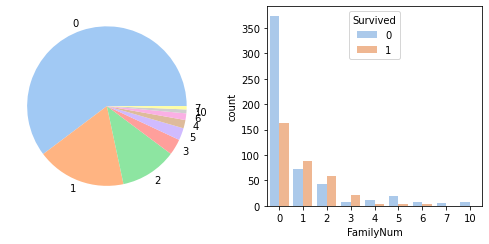

In [31]:
figure, axes = plt.subplots(1, 2)
familyNum_count = cleaned_titanic_train['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(x=cleaned_titanic_train['FamilyNum'], hue=cleaned_titanic_train['Survived'], ax=axes[1])
plt.show()

From the bar chart of whether passengers survived or not, it can be seen that among single passengers, more died than survived. From the perspective of passengers carrying family members, the number of surviving family members between 1 and 3 exceeds the number of fatalities, but when there are more than 3 family members on board, more fatalities occur.

In [32]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  FamilyNum    891 non-null    int64   
dtypes: category(4), float64(2), int64(3), object(4)
memory usage: 66.6+ KB


## Data analyzing

In the analysis steps, we will use the cleaned data above to conduct logistic regression analysis, with the goal of obtaining a mathematical model that can predict the survival situation after the sinking incident based on the various attributes of the Titanic passengers.
First import the modules required for performing logistic regression.

In [33]:
import statsmodels.api as sm

Then we can create a new DataFrame named `lr_titanic_train` to use as the data for our logistic regression analysis.

The reason for distinguishing from `cleaned_titanic_train` is that before conducting regression analysis, we may need to prepare the data, such as introducing dummy variables, which can be performed on `lr_titanic_train`.

In [34]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,0


Removing variables that are unlikely to affect the probability of passenger survival.

In [35]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
lr_titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.000000,1,0,7.2500,1
1,1,1,female,38.000000,1,0,71.2833,1
2,1,3,female,26.000000,0,0,7.9250,0
3,1,1,female,35.000000,1,0,53.1000,1
4,0,3,male,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,0
887,1,1,female,19.000000,0,0,30.0000,0
888,0,3,female,29.699118,1,2,23.4500,3
889,1,1,male,26.000000,0,0,30.0000,0


There are still categorical variables in the data, making it impossible to directly establish a logistic regression model. We need to introduce dummy variables, which are represented by 0 and 1 respectively to indicate whether they belong to that category.

In [36]:
lr_titanic_train = pd.get_dummies(lr_titanic_train, drop_first = True, columns=['Pclass','Sex'], dtype=int)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,1


Next, we need to separate the dependent variable from the independent variable.

The dependent variable is the `Survived` variable, as our purpose in conducting logistic regression is to predict survival based on other variables that may have an impact on the probability of passenger survival.

In [37]:
y = lr_titanic_train['Survived']

We can include variables other than `Survived` as independent variables, but we need to check their correlation. If there is a high correlation between some variables, it can lead to collinearity.

In [38]:
x = lr_titanic_train.drop(['Survived'],axis=1)
x.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


We generally believe that when the absolute value of the correlation coefficient is greater than 0.8, it may lead to severe collinearity. Therefore, when we check, we should find a value with an absolute value greater than 0.8.

In [39]:
x.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


从以上输出来看，`SibSp`和`FamilyNum`之间的相关系数绝对值大于0.8。这符合预期，因为`FamilyNum`是根据`SibSp`和`Parch`计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除`FamilyNum`或`SibSp`。我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留`FamilyNum`。

此外，如果仔细看相关系数数值，会发现`Parch`和`FamilyNum`之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对`Parch`进行移除，避免算法无法收敛。
From the above output, it can be seen that the absolute correlation coefficient between `SibSp` and `FamilyNum` is greater than 0.8. This meets expectations as `FamilyNum` is calculated based on `SibSp` puls `Parch`.

If the correlation between different variables is too high, it will lead to the inability of numerical optimization algorithms to converge and obtain the calculation results of logistic regression model parameters. Therefore, we need to remove `FamilyNum` or `SibSp`. We are interested in whether members of the same family will affect the probability of survival, so we will keep the `FamilyNum`.

In addition, if you carefully examine the correlation coefficient values, you will find a strong correlation between `Parch` and `FamilyNum`, with a correlation coefficient of 0.78, close to 0.8. Therefore, we also removed PPP to avoid the algorithm being unable to converge.

In [40]:
x = x.drop(['SibSp','Parch'], axis=1)

In [41]:
x = sm.add_constant(x) #Adding intercept
x

,const,Age,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,1.0,22.000000,7.2500,1,0,1,1
1,1.0,38.000000,71.2833,1,0,0,0
2,1.0,26.000000,7.9250,0,0,1,0
3,1.0,35.000000,53.1000,1,0,0,0
4,1.0,35.000000,8.0500,0,0,1,1
...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,0,1
887,1.0,19.000000,30.0000,0,0,0,0
888,1.0,29.699118,23.4500,3,0,1,0
889,1.0,26.000000,30.0000,0,0,0,1


Using Logit function, use maximum likelihood optimization to obtain the parameter values of the logistic regression model, and output summary information.

In [42]:
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.3339
Time:                        17:00:19   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

When we set the significance interval to 0.05, the P-value of the above results shows that the model believes that the ticket price has no significant impact on the probability of passenger survival. Therefore, after removing this variable, a logistic regression model can be established again.

In [43]:
x = x.drop(['Fare'], axis=1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.3323
Time:                        17:00:19   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

The logistic regression model predicts that an increase (or presence) in the following factors will reduce the probability of survival: age, number of family members on board, not in first-class class, and gender being male.

To understand the actual meaning of the coefficients of each independent variable, we need to calculate the power of the natural constant.

In [44]:
print("Age:", np.exp(-0.0395)) #Age
print("FamilyNum:", np.exp(-0.2186)) #FamilyNum
print("Pclass_2:", np.exp(-1.1798)) #Pclass_2
print("Pclass_3:", np.exp(-2.3458)) #Pclass_3
print("Sex_male", np.exp(-2.7854)) #Sex_male

Age: 0.9612699539905982
FamilyNum: 0.803643111115195
Pclass_2: 0.30734020049483596
Pclass_3: 0.09577055503172162
Sex_male 0.061704402333015156


The above results indicate that:

For every one year increase in age, the probability of survival decreases by about 4%.

For each additional member of the same family, the probability of survival decreases by about 20%.

The survival probability of second-class passengers is about 71% lower than that of first-class passengers.

The survival probability of third class passengers is about 90% lower than that of first class passengers.

The survival probability of male passengers is about 94% lower than that of female passengers.

Based on the model parameter values, we summarize:
- Younger passengers have a higher probability of survival;
- The survival rate of female passengers is higher than that of male passengers;
- Passengers from higher cabin levels have a higher probability of survival;
- Passengers with fewer family members on board have a higher probability of survival.

The reasons behind the first two may be related to the principle of "letting children and women go first" during the evacuation after the sinking of the Titanic. The third explanation is that passengers with more prestigious cabins at that time may have had the opportunity to escape first. The fourth possibility is that passengers with a large number of family members may be eager to rescue other family members in the event of a disaster rather than choosing to escape, ultimately losing the opportunity to escape on their own.

After obtaining the model, we will use it to predict the survival of Titanic passengers in `titianic_test.csv`.

First read the data of `titianic_test.csv`.

In [45]:
titanic_test = pd.read_csv("./titanic_test.csv")
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Due to the logistic regression model not allowing missing values in the data, we need to check for missing values in `titanic_test`.

In [46]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From the above output, it can be seen that there are missing values in `Age`, `Fare`, and `Cabinet`. Among them, `Fare` and `Cabinet` are not independent variables of the regression model, and even if they are missing, they will not affect the prediction, so they can be ignored `Age` requires us to conduct the same operation to `cleaned_titanic_train`, which is to fill in with the average value.

In [47]:
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())
titanic_test['Age'].isna().sum()

0

The next step is to introduce dummy variables to the classification variables in the model, but before introducing them, we need to first convert the type of the classification variables to Category, and use the `categories` parameter to let the program know all possible classification values. The reason for doing this is that the predicted data may contain incomplete classifications, so we need to ensure that when introducing dummy variables, we will not miss any or all classifications.

In [48]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'], categories=['1','2','3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'], categories=['female','male'])
titanic_test['Embarked'] = pd.Categorical(titanic_test['Embarked'], categories=['C','Q','S'])

In [49]:
#Introduce dummy variables into the classification variables used in the model.
titanic_test = pd.get_dummies(titanic_test, drop_first=True, columns=['Pclass','Sex'], dtype=int)
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


In [50]:
model.params #Check the input variables required for the model.

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

Due to the establishment of the `FamilyNum` variable in the data-organizing step, it is also necessary to add this variable to the predicted data.

In [51]:
titanic_test['FamilyNum'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


In [52]:
# The variables input to the model for prediction need to be consistent with the inputs during model training.
x_test = titanic_test[['Age','FamilyNum','Pclass_2','Pclass_3','Sex_male']]
x_test = sm.add_constant(x_test)

In [53]:
# Call the predict method of the logistic regression model to obtain the predicted survival probability.
predict_value = model.predict(x_test)
predict_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

We obtained the survival probability of Titanic passengers in the `titanic_test.csv` predicted by the logistic regression model. We can predict survival for probabilities greater than or equal to 0.5, and death for probabilities less than 0.5, and output this final prediction result.

In [54]:
predict_value > 0.5

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool